In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import *

**I-Visualisation des signatures**

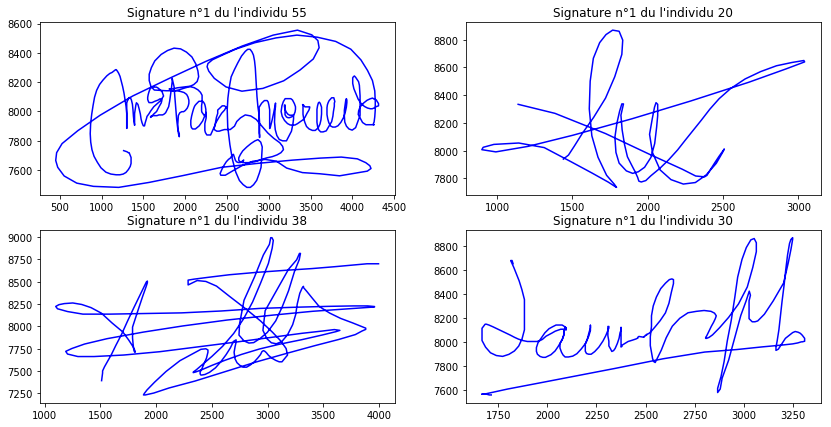

In [2]:
pos=220
plt.figure(figsize=(14,7))
for i in range(1,5):
    k=randint(0,99)
    raw_data=pd.read_csv("./Base de données/%sv0.txt"%k, sep=' ',names =['x','y','P','Az','Al'])
    values = raw_data.values
    plt.subplot(pos+i)
    plt.plot(values[:,0],values[:,1],'b-')
    plt.title("Signature n°1 du l'individu %s"%k)
plt.show()

**II-Mesure de complexité et catégorisation**

***1- Catégorisation avec un modèle GMM à 4 gaussiennes***

In [3]:
comp_GMM4= pd.read_csv('./Complexité avec 4G (100x25).txt',sep='\t', index_col=False,names=[('Signature %s') %k for k in range(1,26) ] )
comp_GMM4.head()

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,...,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25
0,"33,1961744059277","30,6308985280801","31,6203656910053","30,7296766609926","31,3157832108725","31,6482565524524","30,7437509050971","31,6348424142701","31,7079316537508","29,5964450297923",...,"30,0342958836106","31,2569527613730","29,3056083871647","30,0108671457224","31,0947438589213","30,7748576121814","29,9509619138660","31,4218246149869","31,1391659053996","30,6521873555235"
1,"29,9869828171330","30,5837062381622","27,6250318935345","29,2922555541457","29,6692687027387","30,5389433728111","29,9094744187598","29,8241107062975","29,9224068518778","29,2201989699070",...,"28,5769327913098","29,3932615181345","28,9964369676031","27,9856805955865","29,9397020818387","27,5414480940475","29,4620547333355","29,2487689522913","28,5527015556979","29,8705799605189"
2,"30,6677064726565","30,9172779277770","30,7311274611200","30,7487767768297","30,8550651259277","32,2369803929228","31,0652981957418","31,1535692118788","30,9323636236261","30,8297007416180",...,"30,6871471185263","31,8028892467709","30,8388604043470","30,6495924556972","31,2233748115973","31,3485329169249","31,3156784214227","30,6563209202287","30,7050626020391","30,6499450146629"
3,"31,9837768106633","31,4543058330407","31,9040438463085","31,7194491909938","31,7103781242715","32,4487931664295","30,4678310766369","32,5852397676250","32,6598732866986","31,9637329726196",...,"31,7974511198829","32,1085503523444","30,7559984064425","30,8978307501269","32,1067894738137","32,5362086563955","32,5249113866951","33,4531087748344","32,4425673911778","32,4120284935196"
4,"28,6890447560041","30,7127178324077","30,1817786037502","29,9411013832724","29,9580301774015","30,5927512087104","31,3197604565434","31,1545001543812","30,6374396691588","30,1888601947097",...,"30,0737550174327","30,6271080600108","30,4162381535860","29,7023356673910","29,7073363310320","29,7968516225615","30,2103541556582","30,0642969478778","30,3417612568296","30,2491064774280"


In [4]:
#pour pouvoir convertir les données en float, il faut remplacer toute les virgules par des points
val_GMM4= comp_GMM4.values
for i in range(100):
    for j in range(25):
        comp_GMM4.values[i,j]=float(val_GMM4[i,j].replace(',','.'))
comp_GMM4.head()

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,...,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25
0,33.1962,30.6309,31.6204,30.7297,31.3158,31.6483,30.7438,31.6348,31.7079,29.5964,...,30.0343,31.257,29.3056,30.0109,31.0947,30.7749,29.951,31.4218,31.1392,30.6522
1,29.987,30.5837,27.625,29.2923,29.6693,30.5389,29.9095,29.8241,29.9224,29.2202,...,28.5769,29.3933,28.9964,27.9857,29.9397,27.5414,29.4621,29.2488,28.5527,29.8706
2,30.6677,30.9173,30.7311,30.7488,30.8551,32.237,31.0653,31.1536,30.9324,30.8297,...,30.6871,31.8029,30.8389,30.6496,31.2234,31.3485,31.3157,30.6563,30.7051,30.6499
3,31.9838,31.4543,31.904,31.7194,31.7104,32.4488,30.4678,32.5852,32.6599,31.9637,...,31.7975,32.1086,30.756,30.8978,32.1068,32.5362,32.5249,33.4531,32.4426,32.412
4,28.689,30.7127,30.1818,29.9411,29.958,30.5928,31.3198,31.1545,30.6374,30.1889,...,30.0738,30.6271,30.4162,29.7023,29.7073,29.7969,30.2104,30.0643,30.3418,30.2491


**Calcul des complexités moyennes**

In [6]:
#calcul des complexités moyenne
moy_GMM4=np.zeros(100)
for i in range(100):
    moy_GMM4[i]=np.mean(val_GMM4[i,:])
print(moy_GMM4)
meansM = np.mean(moy_GMM4)   #moyenne de l'échantillon qu'on va classer, jouera le role du centre de gravité 
                              # du nuages de points lors du calcul d'inertie interclasse

[ 31.04646349  29.46241222  30.93547329  31.94356146  30.25015111
  30.69617472  30.60642008  28.69650831  29.5907345   30.80059913
  32.06345987  31.99805914  31.10513915  30.71014835  28.51115348
  27.35931399  27.5109694   27.99892006  28.19770551  30.29192518
  28.46388959  26.2287417   28.00710708  29.64004221  31.57792623
  31.29669528  30.24993007  31.53800206  27.19610404  29.63585873
  29.46735178  29.63951761  30.74961786  32.3627558   29.3388454
  29.76742117  26.95869802  31.45807288  32.55400177  31.59067603
  30.17665483  31.77120513  29.69807761  30.1392477   31.26907358
  32.1499329   30.4445463   28.87489621  29.09560817  28.07597339
  30.28862826  29.70810765  31.95483437  32.11137511  28.57136671
  30.79288977  31.85354348  30.22229146  29.56932466  29.29526174
  30.91766268  29.73841562  28.57663434  30.88091649  31.35996394
  29.30761173  29.65280447  28.8611919   26.58845705  30.01935935
  30.67392126  30.27497466  28.76027328  29.9996011   30.74148538
  31.561863

**Classification en 3 clusters**

- **Methode 1: K-moyennes avec distance eucliedienne**

In [7]:
from sklearn.cluster import KMeans
moy_GMM4=moy_GMM4.reshape(moy_GMM4.shape[0],1) 
kmeans_4 = KMeans(n_clusters=3).fit(moy_GMM4)
centers_4=kmeans_4.cluster_centers_
label4=kmeans_4.labels_

In [8]:
n=len(moy_GMM4)
km_c1,km_c2,km_c3=[],[],[]
for i in range(n):
    if label4[i]==0:
        km_c1.append(moy_GMM4[i,0])
    elif label4[i] == 1:
        km_c2.append(moy_GMM4[i,0])
    elif label4[i] == 2:
        km_c3.append(moy_GMM4[i,0])

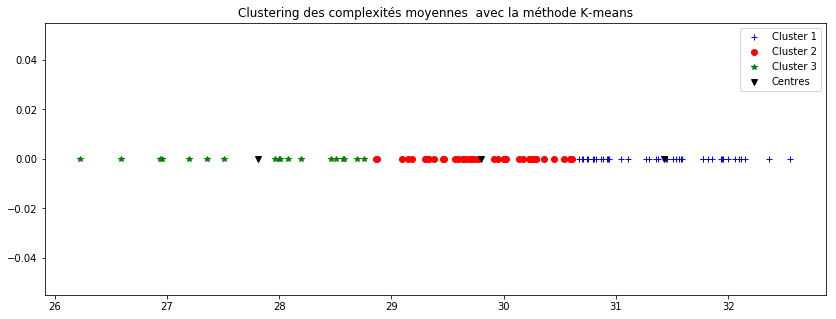

In [9]:
plt.figure(figsize=(14,5))
plt.plot(km_c1,[(0) for i in range(len(km_c1))],'b+',label='Cluster 1')
plt.plot(km_c2,[(0) for i in range(len(km_c2))],'ro',label='Cluster 2')
plt.plot(km_c3,[(0) for i in range(len(km_c3))],'g*',label='Cluster 3')
plt.plot(centers_4,[0,0,0],'kv',label='Centres')
plt.legend()
plt.title('Clustering des complexités moyennes  avec la méthode K-means')
plt.show()

- Caractéristions des différents clusters: nombre d'éléments, moyenne, variance

In [10]:
about_km1=[len(km_c1),np.mean(km_c1),np.var(km_c1)]
about_km2=[len(km_c2),np.mean(km_c2),np.var(km_c2)]
about_km3=[len(km_c3),np.mean(km_c3),np.var(km_c3)]
about_4km=pd.DataFrame(np.array([about_km1,about_km2,about_km3]),
             index = ['Cluster 1', 'Cluster 2', 'Cluster 3'],
             columns=["Nbre ", "Moyenne","Variance"])
val_4km=about_4km.values

#calcul de l'inertie inter-classes, l'intra-classe étant un attribut du modèle
i_inter4=0
for k in range(len(val_4km[:,0])):
    i_inter4+=val_4km[k,0]*(meansM-val_4km[k,1])**2  #distance du centre du cluster k à la moyenne du nuage de points


print("L'inertie intra-cluster est %s"% kmeans_4.inertia_)
print("L'inertie inter-cluster est %s"% i_inter4)
about_4km.head()

L'inertie intra-cluster est 30.09941961
L'inertie inter-cluster est 168.314496499


,Nbre,Moyenne,Variance
Cluster 1,40.0,31.426199,0.278579
Cluster 2,42.0,29.802846,0.207611
Cluster 3,18.0,27.811652,0.568700


- **Methode 2: Ascenscion hiérarchique**

In [11]:
from sklearn.cluster import AgglomerativeClustering
CAH_4= AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward').fit(moy_GMM4)

In [12]:
label41 = CAH_4.labels_

In [13]:
n=len(moy_GMM4)
CAH_c1,CAH_c2,CAH_c3=[],[],[]
for i in range(n):
    if label41[i]==0:
        CAH_c1.append(moy_GMM4[i,0])
    elif label41[i] == 1:
        CAH_c2.append(moy_GMM4[i,0])
    elif label41[i] == 2:
        CAH_c3.append(moy_GMM4[i,0])

- Caractéristions des différents clusters: nombre d'éléments, moyenne, variance

In [14]:
about_CAH1=[len(CAH_c1),np.mean(CAH_c1),np.var(CAH_c1)]
about_CAH2=[len(CAH_c2),np.mean(CAH_c2),np.var(CAH_c2)]
about_CAH3=[len(CAH_c3),np.mean(CAH_c3),np.var(CAH_c3)]
about_4CAH = pd.DataFrame(np.array([about_CAH1,about_CAH2,about_CAH3]),
             index = ['Cluster 1', 'Cluster 2', 'Cluster 3'],
             columns=["Nbre ", "Moyenne","Variance"])
val_4CAH=about_4CAH.values

#calcul des inerties 
i_intra41=0
i_inter41=0
for k in range(len(val_4CAH[:,0])):
    i_inter41 +=val_4CAH[k,0]*(meansM-val_4CAH[k,1])**2  #distance du centre du cluster k à la moyenne du nuage de points
    i_intra41 +=val_4CAH[k,0]*val_4CAH[k,2]

print("L'inertie intra-cluster est %s"% i_intra41)
print("L'inertie inter-cluster est %s"% i_inter41)
about_4CAH.head()

L'inertie intra-cluster est 31.542610617
L'inertie inter-cluster est 166.871305492


,Nbre,Moyenne,Variance
Cluster 1,45.0,31.324179,0.331859
Cluster 2,20.0,27.917292,0.612272
Cluster 3,35.0,29.755524,0.124673


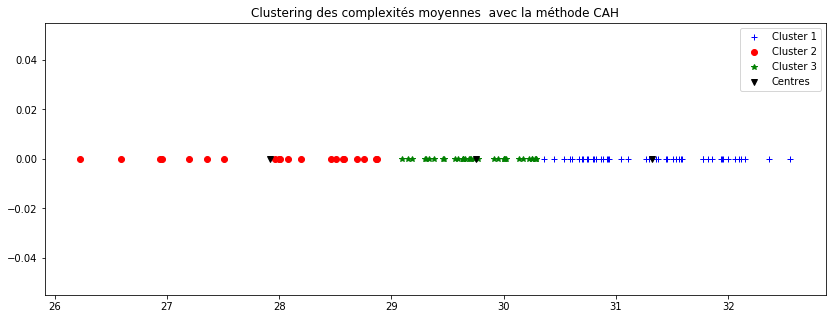

In [15]:
plt.figure(figsize=(14,5))
plt.plot(CAH_c1,[(0) for i in range(len(CAH_c1))],'b+',label='Cluster 1')
plt.plot(CAH_c2,[(0) for i in range(len(CAH_c2))],'ro',label='Cluster 2')
plt.plot(CAH_c3,[(0) for i in range(len(CAH_c3))],'g*',label='Cluster 3')
plt.plot(val_4CAH[:,1],[0,0,0],'kv',label='Centres')
plt.legend()
plt.title('Clustering des complexités moyennes  avec la méthode CAH')
plt.show()

In [16]:
import sklearn.cluster.plot_agglomerative_dendrogram as pad

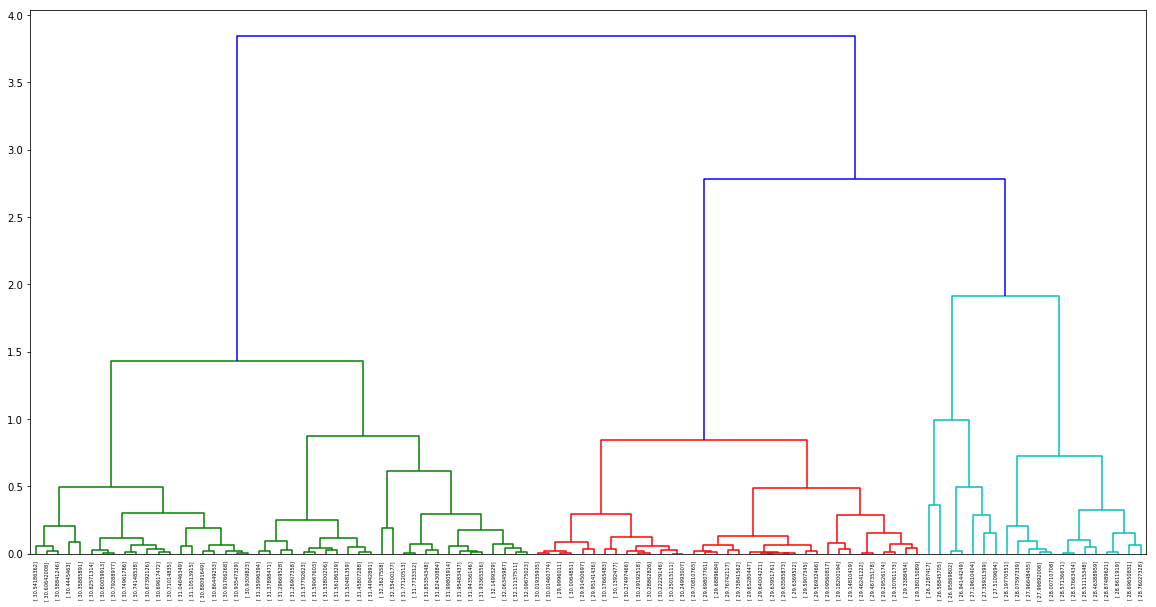

In [18]:
pad.plot_dendrogram(moy_GMM4,CAH_4, labels=moy_GMM4,color_threshold=None)

- détermination du nombre de cluster optimal pour le modèle GMM4

***2- Catégorisation avec un modèle GMM à 8 gaussiennes***

In [19]:
comp_GMM8= pd.read_csv('./Complexité avec 8G (100x25).txt',sep='\t', index_col=False,names=[('Signature %s') %k for k in range(1,26) ] )
#pour pouvoir convertir les données en float, il faut remplacer toute les virgules par des points
val_GMM8= comp_GMM8.values
for i in range(100):
    for j in range(25):
        comp_GMM8.values[i,j]=float(val_GMM8[i,j].replace(',','.'))
comp_GMM8.head()

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,...,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25
0,29.0891,28.3923,27.853,27.7778,25.5319,29.4177,28.0292,30.0334,29.6482,28.5636,...,26.6367,28.0168,27.357,27.0661,26.8177,26.1558,26.9131,28.3726,28.6588,28.8917
1,27.738,28.187,25.1966,26.9834,25.4444,28.0209,28.9193,27.8315,27.9183,27.3841,...,26.5796,27.3821,25.7102,26.7648,26.2998,26.7828,26.3077,27.1633,26.0591,26.3388
2,29.3478,29.762,29.4626,29.5341,29.0974,30.2745,29.0579,31.0465,29.6353,29.351,...,29.6037,30.6542,30.552,30.4535,29.7674,29.6016,30.9835,29.736,28.8975,30.3531
3,29.1374,29.0903,29.4466,29.6449,29.1126,29.5158,29.2671,30.5275,30.1769,28.8143,...,30.2498,29.8064,29.5208,29.6551,29.8589,29.8994,29.8044,30.6552,29.4092,29.338
4,26.9998,27.291,28.5833,27.811,27.8165,29.1208,29.758,30.0384,29.2563,29.8304,...,29.2474,29.2815,29.6442,28.5687,28.4517,28.6201,29.8535,29.321,29.0718,29.0553


**Calcul des complexités moyennes**

In [20]:
moy_GMM8=np.zeros(100)
for i in range(100):
    moy_GMM8[i]=np.mean(val_GMM8[i,:])
print(moy_GMM8)
meansM8 = np.mean(moy_GMM8) 

[ 28.13632421  27.02774981  29.78863293  29.70340756  28.82226094
  29.56389794  28.80625951  26.45299376  28.29591222  28.52292219
  30.68842415  30.44124655  29.69353707  29.40970808  27.12909339
  22.0376821   21.68723421  26.89028473  26.68305916  28.78523583
  26.09318847  21.57395945  23.99742526  28.0248726   30.38080699
  30.01133026  27.42403914  29.12669284  22.83964365  28.82807337
  27.66427467  27.5596595   29.43686319  30.86912787  27.76520225
  28.44846489  22.85131044  29.86867344  30.43739287  29.99412268
  28.73111458  30.86583204  28.43024898  28.93241077  29.81506932
  31.04266032  29.44605101  27.23637445  26.77423942  26.36172588
  28.23133143  28.17254509  30.62942426  31.31050671  26.81333128
  29.47694849  30.18800714  28.13850349  27.74916277  27.51571233
  29.6180339   28.33412024  27.87442561  29.20006637  29.72971887
  27.61650216  28.49347128  27.81440714  24.41919237  27.65113449
  29.50479115  28.5451868   27.45954071  27.91090398  28.7851477
  30.022643

**Classification en 3 clusters**

- **Methode 1: K-moyennes avec distance eucliedienne**

In [21]:
moy_GMM8=moy_GMM8.reshape(moy_GMM8.shape[0],1) 
kmeans_8 = KMeans(n_clusters=3).fit(moy_GMM8)
centers_8=kmeans_8.cluster_centers_
label8=kmeans_8.labels_

In [22]:
n2=len(moy_GMM8)
km8_c1,km8_c2,km8_c3=[],[],[]
for i in range(n2):
    if label8[i]==0:
        km8_c1.append(moy_GMM8[i,0])
    elif label8[i] == 1:
        km8_c2.append(moy_GMM8[i,0])
    elif label8[i] == 2:
        km8_c3.append(moy_GMM8[i,0])

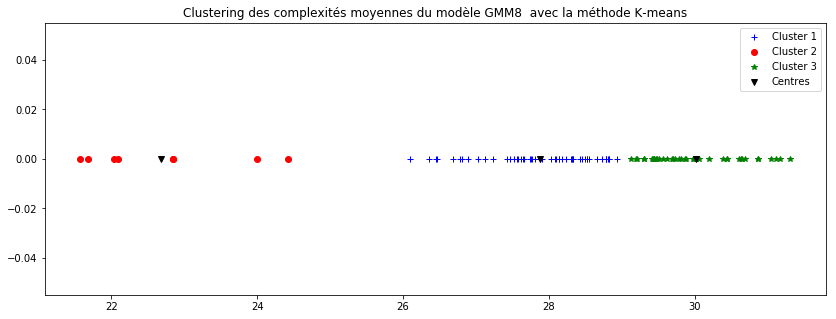

In [23]:
plt.figure(figsize=(14,5))
plt.plot(km8_c1,[(0) for i in range(len(km8_c1))],'b+',label='Cluster 1')
plt.plot(km8_c2,[(0) for i in range(len(km8_c2))],'ro',label='Cluster 2')
plt.plot(km8_c3,[(0) for i in range(len(km8_c3))],'g*',label='Cluster 3')
plt.plot(centers_8,[0,0,0],'kv',label='Centres')
plt.legend()
plt.title('Clustering des complexités moyennes du modèle GMM8  avec la méthode K-means')
plt.show()

- Caractéristions des différents clusters: nombre d'éléments, moyenne, variance

In [24]:
about_8km1=[len(km8_c1),np.mean(km8_c1),np.var(km8_c1)]
about_8km2=[len(km8_c2),np.mean(km8_c2),np.var(km8_c2)]
about_8km3=[len(km8_c3),np.mean(km8_c3),np.var(km8_c3)]
about_8km=pd.DataFrame(np.array([about_8km1,about_8km2,about_8km3]),
             index = ['Cluster 1', 'Cluster 2', 'Cluster 3'],
             columns=["Nbre ", "Moyenne","Variance"])
val_8km=about_8km.values

#calcul de l'inertie inter-classes, l'intra-classe étant un attribut du modèle
i_inter8=0
for k in range(len(val_8km[:,0])):
    i_inter8+=val_8km[k,0]*(meansM8-val_8km[k,1])**2  #distance du centre du cluster k à la moyenne du nuage de points


print("L'inertie intra-cluster est %s"% kmeans_8.inertia_)
print("L'inertie inter-cluster est %s"% i_inter8)
about_8km.head()

L'inertie intra-cluster est 50.8482055034
L'inertie inter-cluster est 378.175326179


,Nbre,Moyenne,Variance
Cluster 1,52.0,27.880915,0.541212
Cluster 2,8.0,22.687009,0.973108
Cluster 3,40.0,30.010458,0.373008


- **Methode 2: Ascenscion hiérarchique**

In [25]:
CAH_8= AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward').fit(moy_GMM8)
label81 = CAH_8.labels_

In [26]:
CAH_8c1,CAH_8c2,CAH_8c3=[],[],[]
for i in range(n2):
    if label81[i]==0:
        CAH_8c1.append(moy_GMM8[i,0])
    elif label81[i] == 1:
        CAH_8c2.append(moy_GMM8[i,0])
    elif label81[i] == 2:
        CAH_8c3.append(moy_GMM8[i,0])

- Caractéristions des différents clusters: nombre d'éléments, moyenne, variance

In [27]:
about_8CAH1=[len(CAH_8c1),np.mean(CAH_8c1),np.var(CAH_8c1)]
about_8CAH2=[len(CAH_8c2),np.mean(CAH_8c2),np.var(CAH_8c2)]
about_8CAH3=[len(CAH_8c3),np.mean(CAH_8c3),np.var(CAH_8c3)]
about_8CAH = pd.DataFrame(np.array([about_8CAH1,about_8CAH2,about_8CAH3]),
             index = ['Cluster 1', 'Cluster 2', 'Cluster 3'],
             columns=["Nbre ", "Moyenne","Variance"])
val_8CAH=about_8CAH.values

#calcul des inerties 
i_intra81=0
i_inter81=0
for k in range(len(val_8CAH[:,0])):
    i_inter81 +=val_8CAH[k,0]*(meansM8-val_8CAH[k,1])**2  #distance du centre du cluster k à la moyenne du nuage de points
    i_intra81 +=val_8CAH[k,0]*val_8CAH[k,2]

print("L'inertie intra-cluster est %s"% i_intra81)
print("L'inertie inter-cluster est %s"% i_inter81)
about_8CAH.head()

L'inertie intra-cluster est 50.8482055034
L'inertie inter-cluster est 378.175326179


,Nbre,Moyenne,Variance
Cluster 1,52.0,27.880915,0.541212
Cluster 2,8.0,22.687009,0.973108
Cluster 3,40.0,30.010458,0.373008


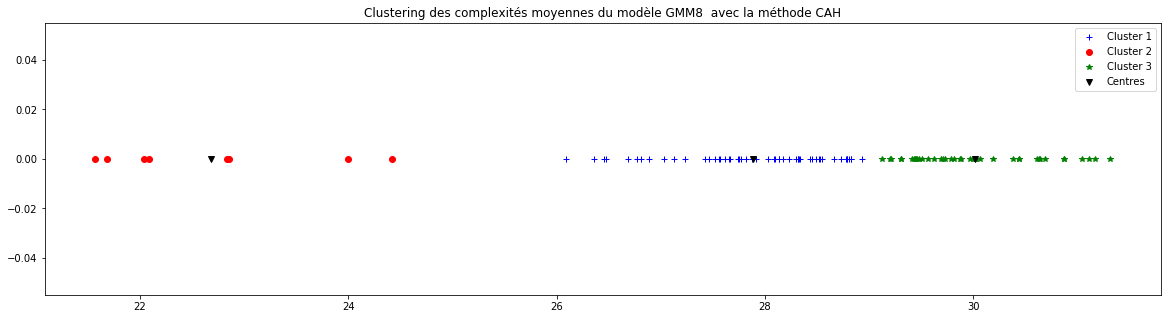

In [28]:
plt.figure(figsize=(20,5))
plt.plot(CAH_8c1,[(0) for i in range(len(CAH_8c1))],'b+',label='Cluster 1')
plt.plot(CAH_8c2,[(0) for i in range(len(CAH_8c2))],'ro',label='Cluster 2')
plt.plot(CAH_8c3,[(0) for i in range(len(CAH_8c3))],'g*',label='Cluster 3')
plt.plot(val_8CAH[:,1],[0,0,0],'kv',label='Centres')
plt.legend()
plt.title('Clustering des complexités moyennes du modèle GMM8  avec la méthode CAH')
plt.show()

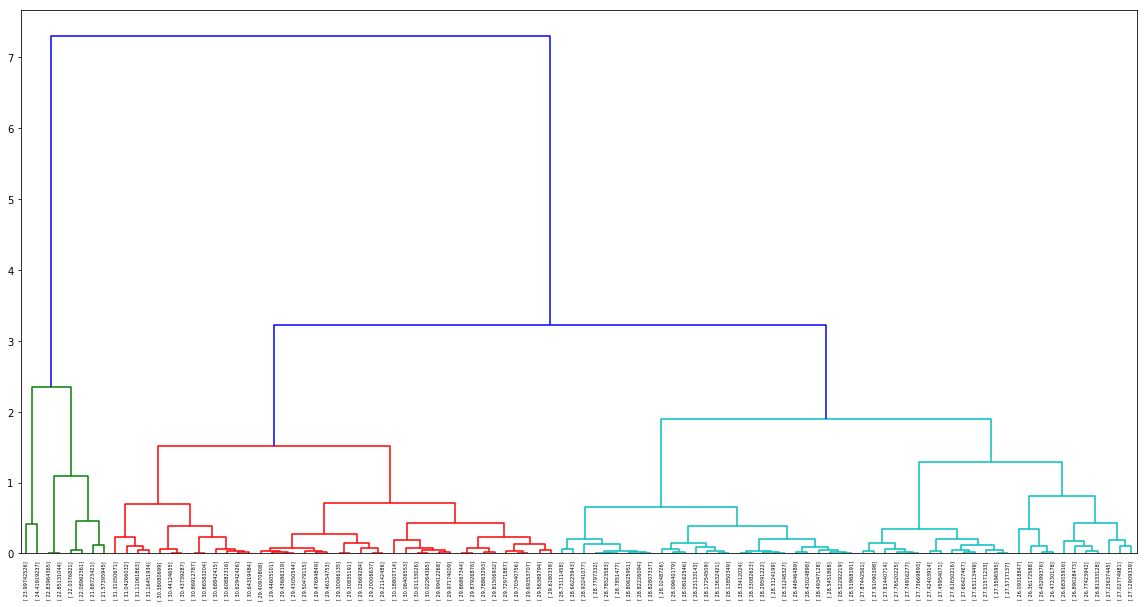

In [79]:
pad.plot_dendrogram(moy_GMM8,CAH_8, labels=moy_GMM8,color_threshold=3)

***3- Catégorisation avec un modèle GMM à 24 gaussiennes***

In [30]:
comp_GMM24= pd.read_csv('./Complexité avec 24G (100x25).txt',sep='\t',
                        index_col=False,names=[('Signature %s') %k for k in range(1,26) ] )
val_GMM24= comp_GMM24.values 
comp_GMM24.head()

,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 7,Signature 8,Signature 9,Signature 10,...,Signature 16,Signature 17,Signature 18,Signature 19,Signature 20,Signature 21,Signature 22,Signature 23,Signature 24,Signature 25
0,19.418379,21.168041,17.978114,20.349810,18.958750,17.880597,20.276367,23.207289,19.794416,19.319806,...,18.574054,17.278135,19.541206,17.414797,20.118963,17.522062,20.535226,17.915963,19.754014,17.689681
1,23.891532,21.410094,22.217169,19.488479,21.591756,25.032245,23.598878,24.555337,22.085059,25.036497,...,22.905254,23.247706,22.164662,21.523057,21.123666,21.441618,23.195070,20.844714,23.126296,21.378493
2,26.781532,27.125942,26.783903,26.252523,26.571913,27.578733,26.430292,26.166015,26.725454,26.996119,...,26.402912,27.805016,27.250634,27.027102,27.148904,26.513630,26.352621,26.475316,26.158157,25.317402
3,25.570153,23.337583,26.074787,23.298449,23.013962,25.097759,23.964793,26.672919,26.146179,25.818987,...,25.172487,26.135858,25.322893,25.230605,25.515222,24.485672,26.171534,25.472147,26.057215,25.046337
4,19.803114,22.290674,22.967518,21.656370,21.557347,24.588345,24.913413,25.045552,22.836658,23.619319,...,22.865086,22.900575,22.795431,23.715837,24.535791,22.223535,24.457346,23.373926,24.337768,23.433979


**Calcul des complexités moyennes**

In [31]:
moy_GMM24=np.zeros(100)
for i in range(100):
    moy_GMM24[i]=np.mean(val_GMM24[i,:])
print(moy_GMM24)
meansM24 = np.mean(moy_GMM24) 

[ 19.33686342  22.57225775  26.63131888  25.29395497  23.17969884
  26.71365134  24.92711485  19.67332645  25.57102157  24.10215774
  28.44059228  26.78442388  26.44859241  26.90111672  23.20623194
  10.69139355  10.20007559  23.39515779  21.99363093  25.67264089
  19.04777908  11.29720114  15.41052422  23.28101111  27.76019044
  27.61584401  19.93038643  22.40401622  11.08732211  25.67267236
  23.36309148  22.36183195  26.32262334  27.52659611  22.54035292
  24.25019497  12.46072452  26.4221881   26.0319774   26.48867268
  24.81860139  28.0112053   24.25895328  26.1766146   27.0467891
  28.87317166  26.99569767  20.66688061  20.39945731  23.24723028
  23.8268522   24.62841835  28.23784231  28.70390423  21.83335105
  27.02917159  26.51041486  24.32635331  24.19148813  23.79188039
  27.00009636  25.02595143  24.82341412  24.21098866  26.76517873
  24.29025005  25.32511341  24.77956868  19.91844585  21.86631478
  26.5888223   25.91457744  24.21923281  23.1906675   24.61536967
  26.912119

**Classification en 3 clusters**

- **Methode 1: K-moyennes avec distance eucliedienne**

In [32]:
moy_GMM24=moy_GMM24.reshape(moy_GMM24.shape[0],1) 
kmeans_24 = KMeans(n_clusters=3).fit(moy_GMM24)
centers_24=kmeans_24.cluster_centers_
label24=kmeans_24.labels_

In [33]:
n3=len(moy_GMM24)
km24_c1,km24_c2,km24_c3=[],[],[]
for i in range(n3):
    if label24[i]==0:
        km24_c1.append(moy_GMM24[i,0])
    elif label24[i] == 1:
        km24_c2.append(moy_GMM24[i,0])
    elif label24[i] == 2:
        km24_c3.append(moy_GMM24[i,0])

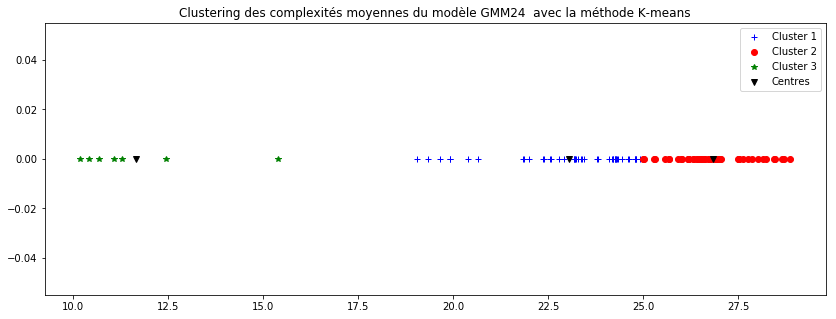

In [34]:
plt.figure(figsize=(14,5))
plt.plot(km24_c1,[(0) for i in range(len(km24_c1))],'b+',label='Cluster 1')
plt.plot(km24_c2,[(0) for i in range(len(km24_c2))],'ro',label='Cluster 2')
plt.plot(km24_c3,[(0) for i in range(len(km24_c3))],'g*',label='Cluster 3')
plt.plot(centers_24,[0,0,0],'kv',label='Centres')
plt.legend()
plt.title('Clustering des complexités moyennes du modèle GMM24  avec la méthode K-means')
plt.show()

- Caractéristions des différents clusters: nombre d'éléments, moyenne, variance

In [35]:
about_24km1=[len(km24_c1),np.mean(km24_c1),np.var(km24_c1)]
about_24km2=[len(km24_c2),np.mean(km24_c2),np.var(km24_c2)]
about_24km3=[len(km24_c3),np.mean(km24_c3),np.var(km24_c3)]
about_24km=pd.DataFrame(np.array([about_24km1,about_24km2,about_24km3]),
             index = ['Cluster 1', 'Cluster 2', 'Cluster 3'],
             columns=["Nbre ", "Moyenne","Variance"])
val_24km=about_24km.values

#calcul de l'inertie inter-classes, l'intra-classe étant un attribut du modèle
i_inter24=0
for k in range(len(val_24km[:,0])):
    i_inter24+=val_24km[k,0]*(meansM24-val_24km[k,1])**2  #distance du centre du cluster k à la moyenne du nuage de points


print("L'inertie intra-cluster est %s"% kmeans_24.inertia_)
print("L'inertie inter-cluster est %s"% i_inter24)
about_24km.head()

L'inertie intra-cluster est 183.043795016
L'inertie inter-cluster est 1491.82824784


,Nbre,Moyenne,Variance
Cluster 1,45.0,23.058865,2.613963
Cluster 2,48.0,26.835033,0.951941
Cluster 3,7.0,11.655480,2.817467


- **Methode 2: Ascenscion hiérarchique**

In [36]:
CAH_24= AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward').fit(moy_GMM24)
label241 = CAH_24.labels_

In [37]:
CAH_24c1,CAH_24c2,CAH_24c3=[],[],[]
for i in range(n3):
    if label241[i]==0:
        CAH_24c1.append(moy_GMM24[i,0])
    elif label241[i] == 1:
        CAH_24c2.append(moy_GMM24[i,0])
    elif label241[i] == 2:
        CAH_24c3.append(moy_GMM24[i,0])

- Caractéristions des différents clusters: nombre d'éléments, moyenne, variance

In [38]:
about_24CAH1=[len(CAH_24c1),np.mean(CAH_24c1),np.var(CAH_24c1)]
about_24CAH2=[len(CAH_24c2),np.mean(CAH_24c2),np.var(CAH_24c2)]
about_24CAH3=[len(CAH_24c3),np.mean(CAH_24c3),np.var(CAH_24c3)]
about_24CAH = pd.DataFrame(np.array([about_24CAH1,about_24CAH2,about_24CAH3]),
             index = ['Cluster 1', 'Cluster 2', 'Cluster 3'],
             columns=["Nbre ", "Moyenne","Variance"])
val_24CAH=about_24CAH.values

#calcul des inerties 
i_intra241=0
i_inter241=0
for k in range(len(val_24CAH[:,0])):
    i_inter241 +=val_24CAH[k,0]*(meansM24-val_24CAH[k,1])**2  #distance du centre du cluster k à la moyenne du nuage de points
    i_intra241 +=val_24CAH[k,0]*val_24CAH[k,2]

print("L'inertie intra-cluster est %s"% i_intra241)
print("L'inertie inter-cluster est %s"% i_inter241)
about_24CAH.head()

L'inertie intra-cluster est 197.631168946
L'inertie inter-cluster est 1477.24087391


,Nbre,Moyenne,Variance
Cluster 1,52.0,23.369515,2.891756
Cluster 2,7.0,11.655480,2.817467
Cluster 3,41.0,27.085749,0.671648


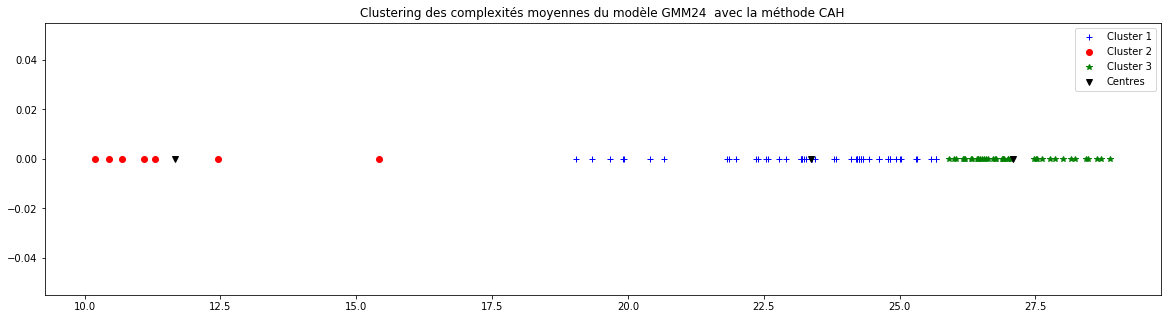

In [39]:
plt.figure(figsize=(20,5))
plt.plot(CAH_24c1,[(0) for i in range(len(CAH_24c1))],'b+',label='Cluster 1')
plt.plot(CAH_24c2,[(0) for i in range(len(CAH_24c2))],'ro',label='Cluster 2')
plt.plot(CAH_24c3,[(0) for i in range(len(CAH_24c3))],'g*',label='Cluster 3')
plt.plot(val_24CAH[:,1],[0,0,0],'kv',label='Centres')
plt.legend()
plt.title('Clustering des complexités moyennes du modèle GMM24  avec la méthode CAH')
plt.show()

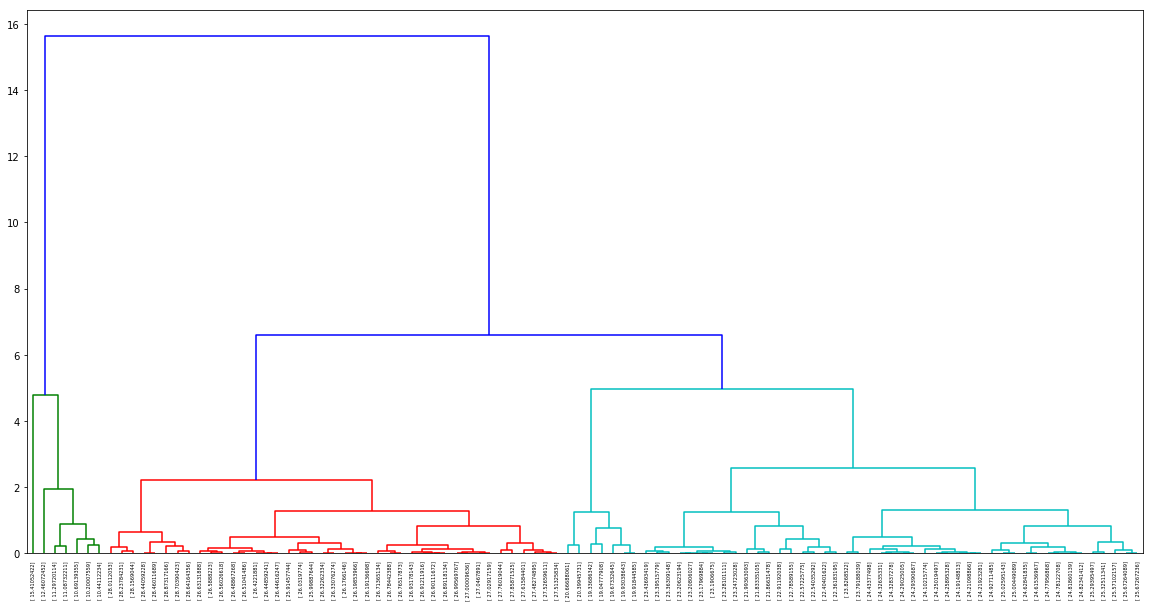

In [80]:
pad.plot_dendrogram(moy_GMM24,CAH_24, labels=moy_GMM24,color_threshold=5)

- **Estimation du nombre de clusters optimal**

[ 0.79098329  0.6107493   0.62190317  0.61834383  0.63961791  0.63551726
  0.6236645   0.59788299  0.5856229 ]


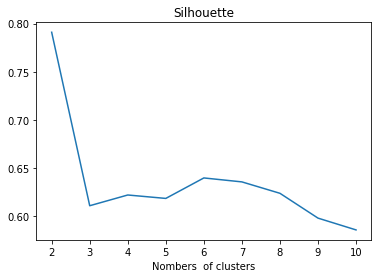

In [86]:
 #librairie pour évaluation des partitions
res=np.zeros(9)
from sklearn import metrics
#utilisation de la métrique "silhouette"
for k in np.arange(9):
    km = KMeans(n_clusters=k+2)
    km.fit(moy_GMM24)
    res[k] = metrics.silhouette_score(moy_GMM24,km.labels_)
print(res)
#graphique
plt.title("Silhouette")
plt.xlabel("Nombers  of clusters") 
plt.plot(np.arange(2,11,1),res) 
plt.show()

**III-Catégorisation des 2500 signatures authentiques en 3 catégories en utilisant la matrice « Complexité avec 24G (100x25) » 
**

- la méthode de clustering choisie est le K-means

In [41]:
from sklearn.utils import shuffle
GMM24=(val_GMM24.reshape(val_GMM24.size,1))   #val_GMM24.size=2500

In [42]:
kmeans_total=KMeans(n_clusters=3).fit(GMM24)

In [43]:
full_centers=kmeans_total.cluster_centers_
full_label=kmeans_total.labels_

In [44]:
n4=val_GMM24.size
full_c1,full_c2,full_c3=[],[],[]
for i in range(n4):
    if full_label[i]==0:
        full_c1.append(GMM24[i,0])
    elif full_label[i] == 1:
        full_c2.append(GMM24[i,0])
    elif full_label[i] == 2:
        full_c3.append(GMM24[i,0])

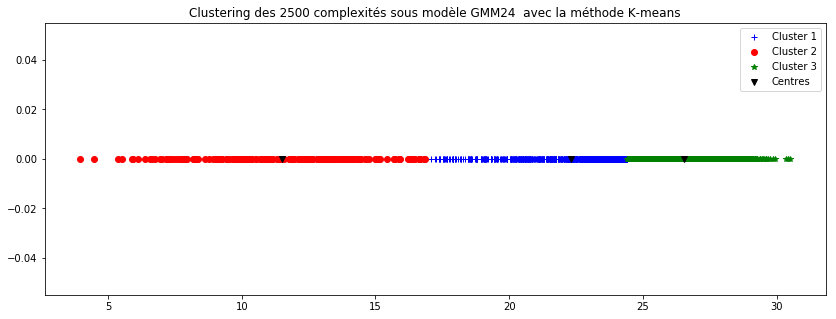

In [45]:
plt.figure(figsize=(14,5))
plt.plot(full_c1,[(0) for i in range(len(full_c1))],'b+',label='Cluster 1')
plt.plot(full_c2,[(0) for i in range(len(full_c2))],'ro',label='Cluster 2')
plt.plot(full_c3,[(0) for i in range(len(full_c3))],'g*',label='Cluster 3')
plt.plot(full_centers,[0,0,0],'kv',label='Centres')
plt.legend()
plt.title('Clustering des 2500 complexités sous modèle GMM24  avec la méthode K-means')
plt.show()

- Caractéristions des différents clusters: nombre d'éléments, moyenne, variance

In [46]:
about_full1=[len(full_c1),np.mean(full_c1),np.var(full_c1)]
about_full2=[len(full_c2),np.mean(full_c2),np.var(full_c2)]
about_full3=[len(full_c3),np.mean(full_c3),np.var(full_c3)]
about_full=pd.DataFrame(np.array([about_full1,about_full2,about_full3]),
             index = ['Cluster 1', 'Cluster 2', 'Cluster 3'],
             columns=["Nbre ", "Moyenne","Variance"])
val_full=about_full.values

#calcul de l'inertie inter-classes, l'intra-classe étant un attribut du modèle
i_interfull=0
for k in range(len(val_full[:,0])):
    i_interfull+=val_full[k,0]*(meansM24-val_full[k,1])**2  #distance du centre du cluster k à la moyenne du nuage de points


print("L'inertie intra-cluster est %s"% kmeans_total.inertia_)
print("L'inertie inter-cluster est %s"% i_interfull)
about_full.head()

L'inertie intra-cluster est 6414.67644429
L'inertie inter-cluster est 39090.6572445


,Nbre,Moyenne,Variance
Cluster 1,837.0,22.310420,3.083082
Cluster 2,174.0,11.505539,8.469476
Cluster 3,1489.0,26.532697,1.585257


In [47]:
personalLab=full_label.reshape(100,25)

In [48]:
personalLab

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 2, 2, ..., 2, 2, 2],
       ..., 
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [49]:
personalLab0=pd.DataFrame((personalLab),
             index = [(m) for m in range(1,101)],
             columns=[('Lbl n°%s') %k for k in range(1,26)])
personalLab0

,Lbl n°1,Lbl n°2,Lbl n°3,Lbl n°4,Lbl n°5,Lbl n°6,Lbl n°7,Lbl n°8,Lbl n°9,Lbl n°10,...,Lbl n°16,Lbl n°17,Lbl n°18,Lbl n°19,Lbl n°20,Lbl n°21,Lbl n°22,Lbl n°23,Lbl n°24,Lbl n°25
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,2,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,2,0,2,0,0,2,0,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5,0,0,0,0,0,2,2,2,0,0,...,0,0,0,0,2,0,2,0,0,0
6,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,2,2,2,0,2,2,2,2,0,2,...,2,2,2,2,0,2,2,2,2,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
10,0,2,0,2,2,0,2,2,2,2,...,0,0,0,0,0,0,0,0,2,2


In [50]:
laberror=np.array([(np.sum(personalLab[i,:])) for i in range(100)])

In [51]:
laberror #toutes sommes ≠ de 0, de 25 ou 50 correspondent à des individus
         #dont les signatures ont été classées dans différents clusters

array([ 0,  8, 50, 42, 12, 50, 38,  3, 50, 22, 50, 50, 50, 50,  4, 24, 25,
        6,  0, 48,  6, 24, 18, 10, 50, 50,  0, 10, 25, 48,  4,  0, 50, 50,
        4, 26, 25, 48, 44, 50, 28, 50, 24, 50, 50, 50, 50,  1,  0,  4, 16,
       32, 50, 50,  0, 50, 48, 20, 22,  6, 50, 38, 38, 22, 50, 28, 44, 38,
        0,  0, 50, 50, 18, 14, 32, 50, 12, 50, 18, 10, 34, 50, 25, 50, 50,
       24, 34, 50,  2, 50, 36, 50, 50, 50, 50, 50, 50, 50, 50, 10])

In [68]:
#individu à problemes
pb_ind=[]
for i in range(laberror.size):
    if laberror[i] not in [0,25,50]:
        pb_ind.append(i)
print(pb_ind)

[1, 3, 4, 6, 7, 9, 14, 15, 17, 19, 20, 21, 22, 23, 27, 29, 30, 34, 35, 37, 38, 40, 42, 47, 49, 50, 51, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 72, 73, 74, 76, 78, 79, 80, 85, 86, 88, 90, 99]


In [71]:
#complexités des signatures de ces individus:
pb_val=[(val_GMM24[i,:]) for i in pb_ind ]

In [72]:
pb_val

[array([ 23.89153231,  21.41009405,  22.21716874,  19.48847896,
         21.59175617,  25.0322449 ,  23.59887757,  24.55533743,
         22.08505937,  25.03649719,  22.76218818,  22.80778706,
         24.65665955,  23.00674366,  21.2154807 ,  22.90525403,
         23.24770624,  22.16466199,  21.52305732,  21.12366642,
         21.44161841,  23.19507047,  20.84471413,  23.126296  ,  21.37849291]),
 array([ 25.57015281,  23.33758254,  26.07478689,  23.2984486 ,
         23.01396193,  25.09775936,  23.96479339,  26.67291895,
         26.14617915,  25.81898655,  25.94008582,  25.08127181,
         26.09580628,  26.24438292,  25.38178656,  25.17248691,
         26.13585824,  25.32289297,  25.23060499,  25.51522209,
         24.4856723 ,  26.17153397,  25.47214682,  26.05721527,  25.04633703]),
 array([ 19.80311373,  22.29067418,  22.96751788,  21.65636963,
         21.55734735,  24.58834541,  24.91341341,  25.0455518 ,
         22.83665846,  23.61931888,  23.67513747,  21.06408927,
        

**IV-Apprentissage et généralisation en utilisant la matrice « Complexité avec 24G (100x25) » 
**

- la méthode de clustering choisie est le K-means

In [52]:
GMM240=shuffle(GMM24)    #on mélange les valeurs pour que les signatures du training et du testing set
                         #soient choisies aléatoirement

training_set=GMM240[:1250,:] 
testing_set=GMM240[1250:,:]
meanLearn=np.mean(training_set)

- Commençons par faire un clustering sur les 2500 signatures ainsi mélangéess:

In [62]:
kmeans_total2=KMeans(n_clusters=3).fit(GMM240)
full_centers2=kmeans_total2.cluster_centers_
full_label2=kmeans_total2.labels_

#regroupement en clusters
q=GMM240.size
full2_c1,full2_c2,full2_c3=[],[],[]
for i in range(q):
    if full_label2[i]==0:
        full2_c1.append(GMM240[i,0])
    elif full_label2[i] == 1:
        full2_c2.append(GMM240[i,0])
    elif full_label2[i] == 2:
        full2_c3.append(GMM240[i,0])
        
#caractérisations des clusters

about_full21=[len(full2_c1),np.mean(full2_c1),np.var(full2_c1)]
about_full22=[len(full2_c2),np.mean(full2_c2),np.var(full2_c2)]
about_full23=[len(full2_c3),np.mean(full2_c3),np.var(full2_c3)]
about_full2=pd.DataFrame(np.array([about_full21,about_full22,about_full23]),
             index = ['Cluster 1', 'Cluster 2', 'Cluster 3'],
             columns=["Nbre ", "Moyenne","Variance"])
val_full2=about_full2.values

#calcul de l'inertie inter-classes, l'intra-classe étant un attribut du modèle
i_interfull2=0
for k in range(len(val_full2[:,0])):
    i_interfull2+=val_full2[k,0]*(meansM24-val_full2[k,1])**2  #distance du centre du cluster k à la moyenne du nuage de points


print("L'inertie intra-cluster est %s"% kmeans_total2.inertia_)
print("L'inertie inter-cluster est %s"% i_interfull2)
about_full2.head()

L'inertie intra-cluster est 6414.73166503
L'inertie inter-cluster est 39090.6353219


,Nbre,Moyenne,Variance
Cluster 1,1490.0,26.531278,1.587193
Cluster 2,174.0,11.505539,8.469476
Cluster 3,836.0,22.307899,3.081450


- Apprentissage et prédiction

In [58]:
km_learn = KMeans(n_clusters=3).fit(training_set)
learn_centers=km_learn.cluster_centers_
learn_label=km_learn.labels_

In [59]:
p=training_set.size
learn_c1,learn_c2,learn_c3=[],[],[]
for i in range(p):
    if learn_label[i]==0:
        learn_c1.append(training_set[i,0])
    elif learn_label[i] == 1:
        learn_c2.append(training_set[i,0])
    elif learn_label[i] == 2:
        learn_c3.append(training_set[i,0])

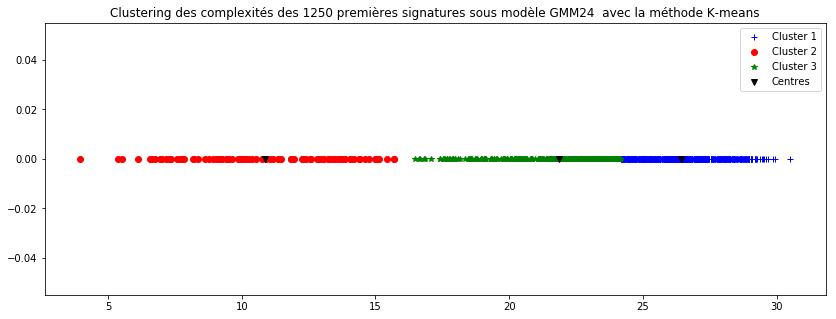

In [60]:
plt.figure(figsize=(14,5))
plt.plot(learn_c1,[(0) for i in range(len(learn_c1))],'b+',label='Cluster 1')
plt.plot(learn_c2,[(0) for i in range(len(learn_c2))],'ro',label='Cluster 2')
plt.plot(learn_c3,[(0) for i in range(len(learn_c3))],'g*',label='Cluster 3')
plt.plot(learn_centers,[0,0,0],'kv',label='Centres')
plt.legend()
plt.title('Clustering des complexités des 1250 premières signatures sous modèle GMM24  avec la méthode K-means')
plt.show()

- Caractérisation des clusters obtenus

In [61]:
about_learn1=[len(learn_c1),np.mean(learn_c1),np.var(learn_c1)]
about_learn2=[len(learn_c2),np.mean(learn_c2),np.var(learn_c2)]
about_learn3=[len(learn_c3),np.mean(learn_c3),np.var(learn_c3)]
about_learn=pd.DataFrame(np.array([about_learn1,about_learn2,about_learn3]),
             index = ['Cluster 1', 'Cluster 2', 'Cluster 3'],
             columns=["Nbre ", "Moyenne","Variance"])
val_learn=about_learn.values

#calcul de l'inertie inter-classes, l'intra-classe étant un attribut du modèle
i_interlearn=0
for k in range(len(val_learn[:,0])):
    i_interlearn+=val_learn[k,0]*(meanLearn-val_learn[k,1])**2  #distance du centre du cluster k à la moyenne du nuage de points


print("L'inertie intra-cluster est %s"% km_learn.inertia_)
print("L'inertie inter-cluster est %s"% i_interlearn)
about_learn.head()

L'inertie intra-cluster est 3441.55449394
L'inertie inter-cluster est 21555.2169366


,Nbre,Moyenne,Variance
Cluster 1,785.0,26.453971,1.840675
Cluster 2,88.0,10.880787,7.861505
Cluster 3,377.0,21.887489,3.459674


- **Classement des 1250 signatures restantes dans les clusters définis ci-avant**

In [66]:
label_pred=km_learn.predict(testing_set)
label_pred

array([0, 2, 2, ..., 0, 1, 0], dtype=int32)

In [67]:
index_wrong=[]
for i in range(1250):
    if full_label2[i+1250]!=label_pred[i]:
        index_wrong.append(i+1250)
print(index_wrong)

[1272, 1300, 1320, 1325, 1344, 1345, 1349, 1355, 1368, 1401, 1406, 1411, 1447, 1474, 1523, 1591, 1631, 1649, 1666, 1675, 1680, 1707, 1712, 1738, 1766, 1797, 1802, 1806, 1815, 1832, 1870, 1918, 1929, 1958, 1977, 1985, 2005, 2115, 2127, 2206, 2261, 2279, 2314, 2325, 2363, 2454, 2465]


- Taux d'erreur

In [65]:
pct=(len(index_wrong))/1250
print("On a %s pourcent de prédiction erronnées sur 1250 signatures classées" %(pct*100))

On a 3.7600000000000002 pourcent de prédiction erronnées sur 1250 signatures classées
